## 1. Data Overview - TODO

In [ ]:
from analysis.visualization.characterisation.notebooks.notebook_config import (
    dl,
    FEATURES,
    N_CLUSTERS,
    DATASET_START,
    DATASET_END,
    TIME_SERIES_MODE,
    WINDOW_MONTHS,
)
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

### Correlation between stations

In [ ]:
stations = dl.get_bicyle_stations()

df_list = []
for station in stations:
    temp_obj = dl.get_bicycle(station, sample_rate="1h")
    temp_df = temp_obj.df.select([
        pl.col("datetime").alias("time"),
        pl.col("channels_all").alias("count"),
        pl.lit(station).alias("station_name")
    ])
    df_list.append(temp_df)

df = pl.concat(df_list)

df = df.filter(pl.col("station_name") != "Ernst-Walz-Brücke West - alt")

df_pivot = (df
    .pivot(
        values="count", 
        index="time", 
        columns="station_name", 
        aggregate_function="sum"
    )
    .sort("time")
)

corr_matrix = df_pivot.select(pl.all().exclude("time")).corr()
stations_labels = df_pivot.select(pl.all().exclude("time")).columns

/var/folders/27/bgwyvysx4qgchbx7ng_h34j80000gn/T/ipykernel_2487/2511104702.py:18: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(


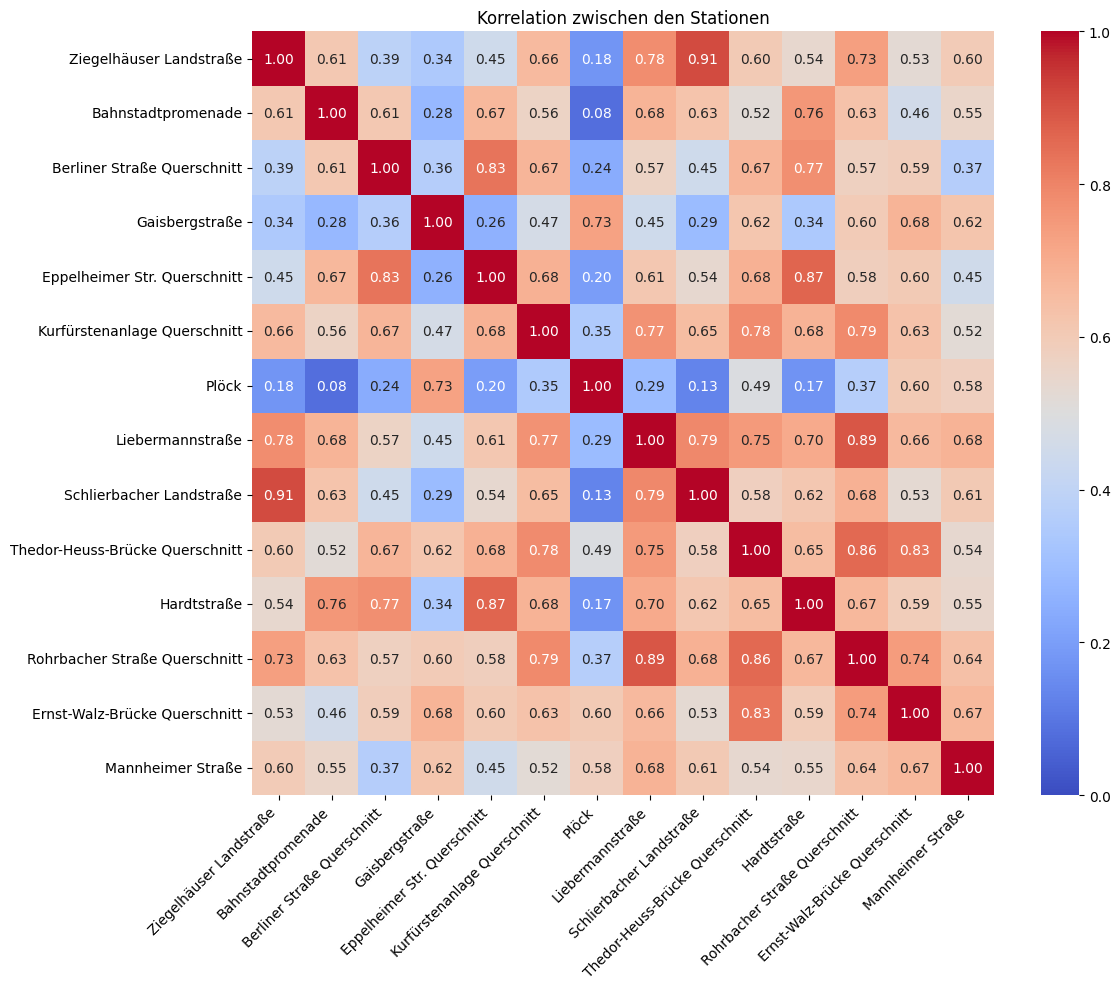

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    xticklabels=stations_labels,
    yticklabels=stations_labels,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=1 
)
plt.title("Korrelation zwischen den Stationen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()